In [1]:
import sys
import spotipy
import spotipy.util as util
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import random
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator
from palettable.colorbrewer.sequential import RdPu_9
import operator

In [2]:
# Assign artist and song name and path to image for word cloud
artist = "Brian Fallon"
song_name = "21 Days"
imagefile = "images/cat_mask.jpg"
font_file = "Rubik-Regular.ttf"

In [3]:
# Construct URL for web scraping
song_url = '{}-{}-lyrics'.format(str(artist).strip().replace(' ', '-'),
                                 str(song_name).strip().replace(' ', '-'))

print('\nSong: {}\nArtist: {}'.format(song_name, artist))


Song: 21 Days
Artist: Brian Fallon


In [4]:
# Assign request using song_url and obtain lyrics from genius.com
request = requests.get("https://genius.com/{}".format(song_url))

if request.status_code == 200:
    html_code = BeautifulSoup(request.text, features="html.parser")
    lyrics = html_code.find("div", {"class": "lyrics"}).get_text().strip()
    print(lyrics)
else:
    print("Song not found")

[Verse 1]
It's so easy
To fall in love
It's not hard
To get lost
Down this river

[Verse 2]
I miss you most
In the morning
We used to talk
Over coffee
But now
I'm gonna have to find
Another friend

[Chorus]
When it's over
We do the leaving
We do the crying
We do the healing
And they say
21 days till I don't miss you
21 days till I don't miss you

[Verse 3]
It's so nice
In the night
Yeah, we breathe you in
You would lie
And say "my friend"

[Verse 4]
I'm just waiting
On the rapture
Trying to minimize
The damage
And hoping
To keep my idle
Hands occupied

[Chorus]
When it's over
We do the leaving
We do the crying
We do the healing
And they say
21 days till I don't miss you
21 days till I don't miss you

[Bridge]
Call it breaking a habit
Call it falling out of love
Call it breaking a habit
One day at time

[Chorus]
When it's over
We do the leaving
We do the crying
We do the healing
And they say
21 days till I don't miss you
21 days till I don't miss you

[Outro]
Call it breaking a habit
(2

In [5]:
# Functions for cleaning up lyric text
def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_notes(text):
    return re.sub("[\(\[].*?[\)\]\}]", "", text)

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = set(stopwords.words('english'))
    stopword_list.add("nt")
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

In [6]:
# Function for colors in word cloud
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(RdPu_9.colors[random.randint(2,8)])


In [7]:
# Remove notes ([Intro], [Verse], [Chorus], etc.)
lyrics_new = remove_notes(lyrics)
# Remove special characters
lyrics_new = remove_special_chars(lyrics_new)
# Remove stopwords
lyrics_new = remove_stopwords(lyrics_new)

In [8]:
# Print lyrics words
lyrics_new
lyrics_new = "Its easy To fall love Its hard To get lost Down river I miss In morning We used talk Over coffee But Im gon na find Another friend When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Its nice In night Yeah breathe You would lie And say friend Im waiting On rapture Trying minimize The damage And hoping To keep idle Hands occupied When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Call breaking habit Call falling love Call breaking habit One day time When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Call breaking habit One day time Call breaking habit One day time I transformed Out mind Call breaking habit"

'Its easy To fall love Its hard To get lost Down river I miss In morning We used talk Over coffee But Im gon na find Another friend When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Its nice In night Yeah breathe You would lie And say friend Im waiting On rapture Trying minimize The damage And hoping To keep idle Hands occupied When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Call breaking habit Call falling love Call breaking habit One day time When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Call breaking habit One day time Call breaking habit One day time I transformed Out mind Call breaking habit'

In [9]:
# Convert image into array
char_mask = np.array(Image.open(imagefile))

# new_image = Image.open(imagefile)
# char_mask = Image.new("RGB", new_image.size, (255,255,255))
# char_mask.paste(new_image,new_image)
# char_mask = np.array(char_mask)

Generating word cloud....
Making plot


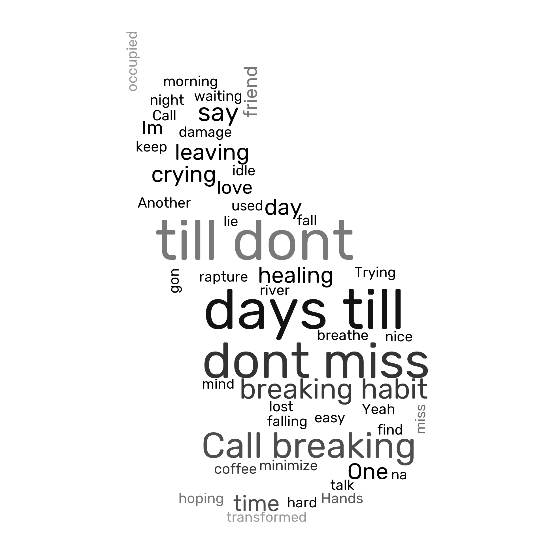

In [10]:
# Generate wordcloud on white background
print('Generating word cloud....')
wc = WordCloud(font_path = font_file,background_color="white", max_words=200, mask=char_mask, random_state=42)
wc.generate(lyrics_new)
print('Making plot')

image_colors = ImageColorGenerator(char_mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud_white.png', dpi=200)
plt.show()


Generating word cloud....
Making plot


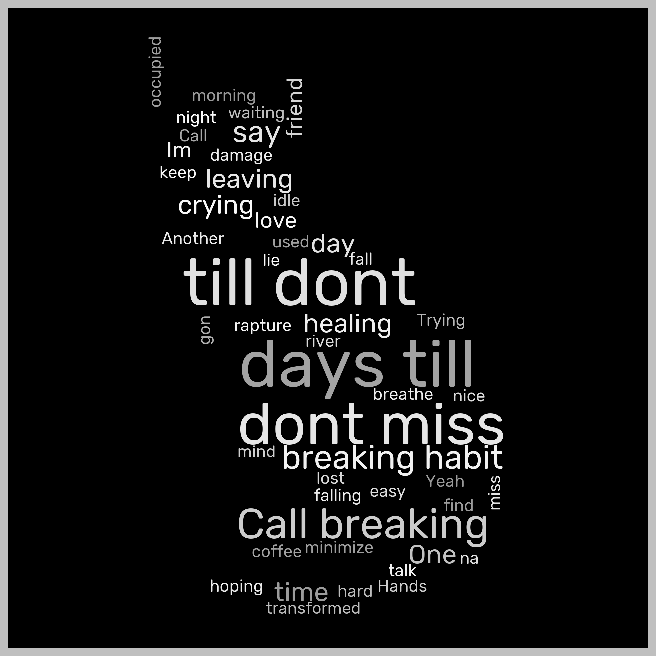

In [11]:
# Generate word cloud on black background
print('Generating word cloud....')
wc = WordCloud(font_path = font_file,background_color="black", max_words=200, mask=char_mask, random_state=42)
wc.generate(lyrics_new)
print('Making plot')

image_colors = ImageColorGenerator(char_mask)
wc.recolor(color_func=grey_color_func)
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.imshow(wc,  interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud_black.png', dpi=200)
plt.show()

Generating word cloud....
Making plot


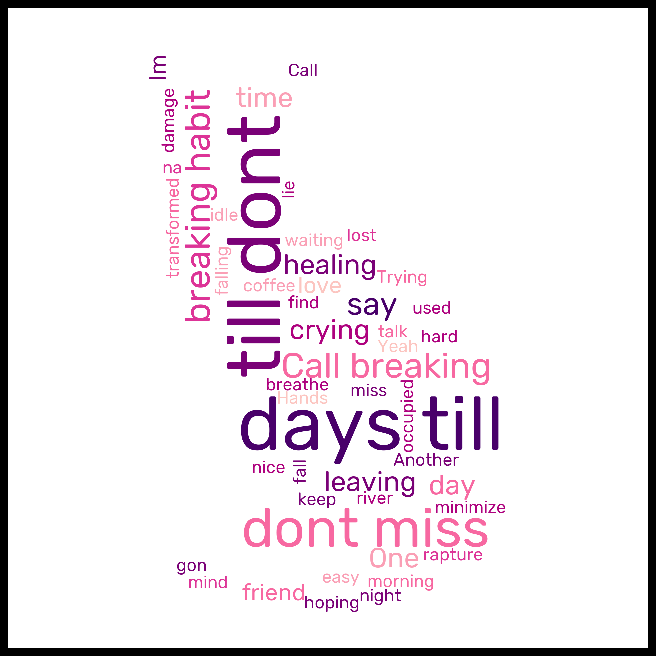

In [12]:
print('Generating word cloud....')
wc = WordCloud(font_path = font_file, background_color="white", max_words=2000, mask=char_mask,
               max_font_size=300)
wc.generate(lyrics_new)
print('Making plot')

image_colors = ImageColorGenerator(char_mask)
wc.recolor(color_func=color_func)
# wc.recolor(color_func=image_colors)
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud_color.png', dpi=200)
plt.show()

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts
d = word_count(lyrics_new)
#sorted(d.items(), key=operator.itemgetter(1), reverse=True)